# 04-comparing-FS-versions-on-same-dataset.ipynb

Using `ibs-brain` conda environment

Arvid Lundervold

Last updated: 2024-12-02


Comparing FreeSurfer v 6.0.1 (cross-sectional) and version 7.4.1 (cross-sectional) on the Bergen cohort with 78 participants.<br>

The files<br>
- `all_subjects_measure_fs7_cros_sectional.csv`, 
- `all_subjects_measures_fs7_longitudinal_stream.csv`,and 
- `all_subjects_measures_fs6.csv`(cross-sectional) 

are produced by `compare_FSversions_al.ipynb` (in the `ibs-brain-dev`repo, only)<br>
and further saved to:<br> 
- `../data/fs7_cross_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv`, 
- `../data/fs7_long_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv`, and 
- `../data/fs6_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv`, 

respectively.


### Example stats file (BGA_046)

#### FS v 6.0.1
_CROSS-SECTIONAL_:

**BG_046_20190531_0825_aseg.stats:**<br>
Measure EstimatedTotalIntraCranialVol, eTIV, Estimated Total Intracranial Volume, 1656739.304977, mm^3<br>
ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange  <br>
  1   4      9213     9541.5  Left-Lateral-Ventricle            24.1233    13.2426     0.0000    84.0000    84.0000 

#### FS v 7.4.1
_CROSS-SECTIONAL_:

**BG_046_20190531_0825_long_aseg.stats:**<br>
Measure EstimatedTotalIntraCranialVol, eTIV, Estimated Total Intracranial Volume, 1736077.544622, mm^3<br>
ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange  <br>
  1   4      9302     9565.0  Left-Lateral-Ventricle            26.6249    13.3030     4.0000    86.0000    82.0000 

_LONGITUDINAL STREAM_:

**BG_046_20190531_0825.long.BG_004_base_long_aseg.stats:**<br>
Measure EstimatedTotalIntraCranialVol, eTIV, Estimated Total Intracranial Volume, 1743418.965710, mm^3<br>
ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange  <br>
  1   4      8783     8991.8  Left-Lateral-Ventricle            22.3853    12.3294     0.0000    70.0000    70.0000 


In [15]:
import os
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

home = os.path.expanduser('~')
%matplotlib inline

In [16]:
if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10/11 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install')

OK, you are running on MacOS (Darwin Kernel Version 24.1.0: Thu Oct 10 21:02:27 PDT 2024; root:xnu-11215.41.3~2/RELEASE_X86_64)


In [17]:
df_fs6_cross = pd.read_csv('../data/fs6_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv')
df_fs7_cross = pd.read_csv('../data/fs7_cross_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv')
df_fs7_long = pd.read_csv('../data/fs7_long_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv')


In [18]:
df_fs6_cross

,Subject,Group,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,...,BrainSegVol,BrainSegVolNotVent,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol
0,BGA_046,IBS,1.656739e+06,15798.4,62485.1,8398.0,3977.2,5478.8,2141.4,5136.9,...,1328062.0,1300437.0,258949.929272,263251.114768,522201.044040,274908.295272,278458.480929,553366.776201,67355.0,716754.044040
1,BGA_047,IBS,1.298615e+06,11829.9,55572.3,6954.8,2730.6,3744.3,1655.3,3951.3,...,1077449.0,1057641.0,246489.920670,240230.000960,486719.921630,195441.183118,188217.177971,383658.361090,51589.0,651544.921630
2,BGA_048,IBS,1.292984e+06,13925.9,52554.0,7421.1,3399.6,5102.1,2010.3,4723.0,...,1056661.0,1038836.0,223573.051052,222593.790010,446166.841061,199159.828471,200072.966734,399232.795205,60160.0,612686.841061
3,BGA_050,IBS,1.633022e+06,17741.3,48855.0,8278.9,3841.4,5198.3,2156.4,4562.7,...,1291667.0,1272599.0,261386.266251,262864.586632,524250.852883,274652.166574,276260.434358,550912.600932,64327.0,689174.852883
4,BGA_051,IBS,1.573626e+06,15380.1,57807.7,8299.9,3457.9,5190.6,2135.0,4659.2,...,1277079.0,1262046.0,262825.708782,259604.577045,522430.285827,263318.803712,262565.956089,525884.759802,62723.0,706788.285827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,BGA_166,HC,1.354683e+06,15492.9,49468.8,8071.5,3059.4,4228.4,1779.2,3872.2,...,1113783.0,1090811.0,245585.967094,243147.205361,488733.172455,208134.059290,208671.649416,416805.708707,55815.0,644921.172455
74,BGA_167,HC,1.352272e+06,15464.9,45437.7,7466.2,2834.5,4089.7,1694.3,3782.4,...,1045968.0,1023044.0,221197.829159,220734.192652,441932.021810,204370.518569,202097.857273,406468.375842,52832.0,588406.021810
75,BGA_168,HC,1.598696e+06,14630.0,54099.4,7640.3,3760.9,4792.9,1997.3,3926.4,...,1193455.0,1172525.0,249251.106723,249392.552845,498643.659568,235556.076141,237046.577269,472602.653410,58868.0,670004.659568
76,BGA_171,HC,1.559106e+06,14884.5,67731.3,8589.4,3731.8,5839.0,2500.6,4781.4,...,1295071.0,1280053.0,279914.091111,282386.426404,562300.517515,244827.405506,241897.905339,486725.310845,67793.0,765127.517515


In [5]:
df_fs7_cross

,Subject,Group,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,...,BrainSegVol,BrainSegVolNotVent,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol
0,BGA_046,IBS,1.736078e+06,18429.1,61895.8,8721.5,3956.5,5568.2,2175.0,5463.3,...,1336741.0,1308926.0,262491.992482,266812.769792,529304.762273,275067.0,278507.0,553574.0,69459.0,722397.762273
1,BGA_047,IBS,1.354764e+06,13085.3,54599.8,7359.5,2734.7,3812.1,1723.9,4032.5,...,1081178.0,1061247.0,246919.239525,240071.120963,486990.360488,197301.0,190654.0,387955.0,52493.0,650094.360488
2,BGA_048,IBS,1.350298e+06,14465.7,51996.2,7688.3,3506.7,5163.8,2003.8,4733.4,...,1049573.0,1031785.0,220338.774397,223842.013297,444180.787694,196882.0,198089.0,394971.0,60449.0,610119.787694
3,BGA_050,IBS,1.565224e+06,15773.2,49116.7,8753.7,3896.0,5231.9,2180.4,4618.5,...,1288838.0,1269847.0,259437.854998,261059.171007,520497.026005,276819.5,279644.5,556464.0,64601.0,685507.026005
4,BGA_051,IBS,1.642945e+06,17672.7,56250.0,9090.6,3416.2,5058.4,2178.1,4635.5,...,1277049.0,1262082.0,260228.700511,261992.570787,522221.271299,262855.5,263905.5,526761.0,63862.0,703196.271299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,BGA_166,HC,1.398969e+06,16244.6,48927.3,7747.4,3017.4,4224.2,1869.4,4036.7,...,1108853.0,1085960.0,246116.256432,242550.015661,488666.272093,207638.5,206431.5,414070.0,55234.0,643343.272093
74,BGA_167,HC,1.400898e+06,14939.5,45937.9,7197.6,2911.4,4133.4,1661.2,3811.1,...,1047264.0,1024361.0,222101.499817,222905.840707,445007.340524,204095.0,202883.0,406978.0,53420.0,591878.340524
75,BGA_168,HC,1.251247e+06,15280.1,52799.0,7994.0,3681.8,4761.7,1806.0,3951.7,...,1188720.0,1167870.0,247400.464400,250393.685387,497794.149787,235777.0,238964.0,474741.0,58717.0,664770.149787
76,BGA_171,HC,1.610500e+06,15356.6,67484.3,9387.8,3698.1,5966.3,2419.2,4816.1,...,1288720.0,1273556.0,284889.740757,278222.242754,563111.983510,243989.5,236898.5,480888.0,69588.0,765700.983510


In [19]:
df_fs7_long

,Subject,Group,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,...,BrainSegVol,BrainSegVolNotVent,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol
0,BGA_046,IBS,1.743419e+06,16199.2,60684.9,8800.7,4226.1,5854.1,2176.1,5402.5,...,1340061.0,1310345.0,272226.328219,277273.665215,549499.993435,268076.5,269543.5,537620.0,71945.0,742907.993435
1,BGA_047,IBS,1.360311e+06,13548.9,53594.4,7398.7,2892.8,4070.7,1793.0,4079.7,...,1081893.0,1060610.0,253929.263592,248601.549223,502530.812815,188910.0,181556.0,370466.0,55542.0,667294.812815
2,BGA_048,IBS,1.350452e+06,14989.3,51007.0,7772.4,3713.3,5528.5,2023.0,4771.4,...,1059918.0,1040709.0,228270.211605,228775.745517,457045.957121,195301.5,194898.5,390200.0,63834.0,624112.957121
3,BGA_050,IBS,1.595000e+06,16680.8,49288.4,9255.1,4266.2,5776.7,2107.8,4665.7,...,1295355.0,1275602.0,270760.458438,271205.967455,541966.425893,267143.5,266658.5,533802.0,69806.0,712389.425893
4,BGA_051,IBS,1.645577e+06,16666.2,56563.1,9408.0,3635.3,5483.2,2167.6,4712.2,...,1284076.0,1268040.0,269016.392182,271870.118191,540886.510372,255691.0,256852.0,512543.0,67021.0,726150.510372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,BGA_166,HC,1.399586e+06,16118.2,48939.2,8330.1,3309.1,4580.1,1900.5,3981.2,...,1126244.0,1101750.0,255959.118761,253507.975856,509467.094617,204095.0,203664.0,407759.0,58593.0,666627.094617
74,BGA_167,HC,1.394849e+06,15922.9,44503.4,7212.9,3041.1,4313.1,1609.4,3848.4,...,1040185.0,1015780.0,225988.416853,226567.419438,452555.836291,196668.0,193138.0,389806.0,55297.0,598683.836291
75,BGA_168,HC,1.259360e+06,16334.3,51881.9,7905.2,3849.7,5105.0,1889.2,4006.9,...,1200137.0,1178028.0,255576.726804,258578.079305,514154.806109,232149.5,234549.5,466699.0,60849.0,682584.806109
76,BGA_171,HC,1.609011e+06,16966.7,65839.5,9541.9,4023.8,6215.1,2612.3,4773.5,...,1311326.0,1295338.0,296427.382722,292926.183545,589353.566267,240242.0,232881.0,473123.0,73003.0,793611.566267


In [20]:
# Check that the columns are the same
#df_fs6_cross.columns
#df_fs7_cross.columns
#df_fs7_long.columns

In [21]:
# Check if all DataFrames have identical columns
print("Are all columns identical?", 
      (df_fs6_cross.columns == df_fs7_cross.columns).all() and 
      (df_fs7_cross.columns == df_fs7_long.columns).all())

# Display any differences if they exist
print("\nUnique columns in each DataFrame:")
print("\nFS6 Cross:", set(df_fs6_cross.columns))
print("FS7 Cross:", set(df_fs7_cross.columns))
print("FS7 Long:", set(df_fs7_long.columns))

# Find any differences
differences = set(df_fs6_cross.columns) ^ set(df_fs7_cross.columns) | set(df_fs7_cross.columns) ^ set(df_fs7_long.columns)
if differences:
    print("\nColumns that differ:", differences)
else:
    print("\nAll columns are identical")


Are all columns identical? True

Unique columns in each DataFrame:

FS6 Cross: {'CC_Mid_Posterior', 'Right-Accumbens-area', 'Right-Caudate', 'Right-Thalamus', 'WM-hypointensities', 'SubCortGrayVol', 'Right-Cerebellum-Cortex', 'Left-Thalamus', 'Group', 'Left-Cerebellum-White-Matter', 'Left-Pallidum', 'eTIV', 'Left-Amygdala', 'rhCortexVol', 'Right-Cerebellum-White-Matter', 'CortexVol', 'Subject', 'BrainSegVol', 'Right-Pallidum', 'CSF', 'Left-Hippocampus', 'BrainSegVolNotVent', 'Right-Hippocampus', 'CC_Anterior', 'Left-Putamen', 'TotalGrayVol', 'CC_Posterior', 'rhCerebralWhiteMatterVol', 'Left-Cerebellum-Cortex', 'CC_Central', 'CerebralWhiteMatterVol', 'Left-Accumbens-area', 'Right-Amygdala', 'Left-Caudate', 'Right-Putamen', 'CC_Mid_Anterior', 'lhCortexVol', 'lhCerebralWhiteMatterVol'}
FS7 Cross: {'CC_Mid_Posterior', 'Right-Accumbens-area', 'Right-Caudate', 'Right-Thalamus', 'WM-hypointensities', 'SubCortGrayVol', 'Right-Cerebellum-Cortex', 'Left-Thalamus', 'Group', 'Left-Cerebellum-White

In [22]:
# Make eTIV-normalized data frames
df_fs6_cross_etiv_normalized = df_fs6_cross.copy()
df_fs7_cross_etiv_normalized = df_fs7_cross.copy()
df_fs7_long_etiv_normalized = df_fs7_long.copy()

# For each column make the eTIV-normalized version
for col in df_fs6_cross.columns:
    if col == 'eTIV':
        df_fs6_cross_etiv_normalized[col] = df_fs6_cross[col]
        df_fs7_cross_etiv_normalized[col] = df_fs7_cross[col]
        df_fs7_long_etiv_normalized[col] = df_fs7_long[col]
    # Skip non-numeric columns
    if col not in ['Subject', 'Group'] and col != 'eTIV':
        df_fs6_cross_etiv_normalized[col] = df_fs6_cross[col] / df_fs6_cross['eTIV']
        df_fs7_cross_etiv_normalized[col] = df_fs7_cross[col] / df_fs7_cross['eTIV']
        df_fs7_long_etiv_normalized[col] = df_fs7_long[col] / df_fs7_long['eTIV']


In [23]:
df_fs6_cross_etiv_normalized.T.tail(38)



,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Subject,BGA_046,BGA_047,BGA_048,BGA_050,BGA_051,BGA_053,BGA_055,BGA_056,BGA_057,BGA_058,...,BGA_159,BGA_160,BGA_161,BGA_164,BGA_165,BGA_166,BGA_167,BGA_168,BGA_171,BGA_172
Group,IBS,IBS,IBS,IBS,IBS,HC,IBS,IBS,IBS,IBS,...,IBS,IBS,IBS,HC,HC,HC,HC,HC,HC,HC
eTIV,1656739.304977,1298615.242212,1292984.166063,1633021.983624,1573625.779627,1440848.239821,1534443.56086,1401925.955373,1352934.888375,1189956.504381,...,1331908.903156,1339901.002853,1385849.069087,1262288.80274,1418825.275846,1354682.572843,1352272.122386,1598696.4581,1559105.869452,1805663.110393
Left-Cerebellum-White-Matter,0.009536,0.00911,0.01077,0.010864,0.009774,0.00989,0.010238,0.010458,0.011688,0.011577,...,0.010425,0.01123,0.010037,0.011201,0.010254,0.011437,0.011436,0.009151,0.009547,0.010106
Left-Cerebellum-Cortex,0.037716,0.042794,0.040646,0.029917,0.036735,0.04513,0.037062,0.040038,0.044538,0.037623,...,0.043357,0.045308,0.041507,0.040413,0.038859,0.036517,0.033601,0.03384,0.043442,0.032932
Left-Thalamus,0.005069,0.005356,0.00574,0.00507,0.005274,0.005185,0.005633,0.004361,0.005222,0.004118,...,0.004959,0.005648,0.005316,0.005331,0.005505,0.005958,0.005521,0.004779,0.005509,0.005013
Left-Caudate,0.002401,0.002103,0.002629,0.002352,0.002197,0.002483,0.002325,0.002186,0.002429,0.002098,...,0.002893,0.002217,0.002221,0.002556,0.002277,0.002258,0.002096,0.002352,0.002394,0.002144
Left-Putamen,0.003307,0.002883,0.003946,0.003183,0.003298,0.003762,0.003401,0.003203,0.003267,0.003108,...,0.003655,0.003979,0.004095,0.003587,0.004363,0.003121,0.003024,0.002998,0.003745,0.00273
Left-Pallidum,0.001293,0.001275,0.001555,0.00132,0.001357,0.001348,0.001546,0.001216,0.001255,0.001223,...,0.001439,0.001386,0.001456,0.001454,0.00167,0.001313,0.001253,0.001249,0.001604,0.001051
Left-Hippocampus,0.003101,0.003043,0.003653,0.002794,0.002961,0.002958,0.002778,0.002681,0.002901,0.002986,...,0.003075,0.002658,0.003445,0.003002,0.003165,0.002858,0.002797,0.002456,0.003067,0.002369


In [25]:
df_fs7_cross_etiv_normalized.T.tail(38)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Subject,BGA_046,BGA_047,BGA_048,BGA_050,BGA_051,BGA_053,BGA_055,BGA_056,BGA_057,BGA_058,...,BGA_159,BGA_160,BGA_161,BGA_164,BGA_165,BGA_166,BGA_167,BGA_168,BGA_171,BGA_172
Group,IBS,IBS,IBS,IBS,IBS,HC,IBS,IBS,IBS,IBS,...,IBS,IBS,IBS,HC,HC,HC,HC,HC,HC,HC
eTIV,1736077.544622,1354763.769272,1350298.314054,1565224.255213,1642945.341961,1507048.930931,1529002.633102,1440642.213483,1224448.695034,1219181.388384,...,1364726.091982,1385958.728368,1403947.432866,1269552.061473,1501955.217195,1398969.298197,1400897.702833,1251246.608872,1610499.630185,1886477.658681
Left-Cerebellum-White-Matter,0.010615,0.009659,0.010713,0.010077,0.010757,0.009539,0.010452,0.010707,0.014615,0.010262,...,0.010411,0.010833,0.009174,0.010801,0.01017,0.011612,0.010664,0.012212,0.009535,0.010549
Left-Cerebellum-Cortex,0.035653,0.040302,0.038507,0.03138,0.034237,0.042933,0.037655,0.039068,0.048818,0.03695,...,0.041956,0.044317,0.039628,0.040229,0.036443,0.034974,0.032792,0.042197,0.041903,0.031473
Left-Thalamus,0.005024,0.005432,0.005694,0.005593,0.005533,0.005025,0.00569,0.004179,0.005997,0.004058,...,0.004737,0.005418,0.005603,0.005637,0.00516,0.005538,0.005138,0.006389,0.005829,0.004708
Left-Caudate,0.002279,0.002019,0.002597,0.002489,0.002079,0.002468,0.002302,0.002198,0.002664,0.00207,...,0.002756,0.002152,0.002322,0.00262,0.002165,0.002157,0.002078,0.002943,0.002296,0.002061
Left-Putamen,0.003207,0.002814,0.003824,0.003343,0.003079,0.003703,0.003409,0.003187,0.003606,0.003058,...,0.003628,0.0039,0.003903,0.002739,0.004141,0.00302,0.002951,0.003806,0.003705,0.002943
Left-Pallidum,0.001253,0.001272,0.001484,0.001393,0.001326,0.001358,0.001459,0.001224,0.00145,0.001149,...,0.001488,0.00142,0.001409,0.001584,0.001567,0.001336,0.001186,0.001443,0.001502,0.001025
Left-Hippocampus,0.003147,0.002977,0.003505,0.002951,0.002821,0.002798,0.002948,0.002869,0.003258,0.00301,...,0.003026,0.002727,0.003278,0.002997,0.00295,0.002885,0.00272,0.003158,0.00299,0.002336


In [26]:
df_fs7_long_etiv_normalized.T.tail(38)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Subject,BGA_046,BGA_047,BGA_048,BGA_050,BGA_051,BGA_053,BGA_055,BGA_056,BGA_057,BGA_058,...,BGA_159,BGA_160,BGA_161,BGA_164,BGA_165,BGA_166,BGA_167,BGA_168,BGA_171,BGA_172
Group,IBS,IBS,IBS,IBS,IBS,HC,IBS,IBS,IBS,IBS,...,IBS,IBS,IBS,HC,HC,HC,HC,HC,HC,HC
eTIV,1743418.96571,1360310.545682,1350452.189995,1595000.281723,1645577.317238,1505440.566272,1515539.250593,1440789.042498,1224504.661565,1232362.35937,...,1379140.481423,1386840.158537,1403645.961581,1278834.412556,1504933.43298,1399585.857744,1394849.010741,1259359.819854,1609011.46356,1888063.495394
Left-Cerebellum-White-Matter,0.009292,0.00996,0.011099,0.010458,0.010128,0.00966,0.010847,0.010793,0.013654,0.01088,...,0.010364,0.011587,0.00948,0.011333,0.010095,0.011516,0.011416,0.01297,0.010545,0.010399
Left-Cerebellum-Cortex,0.034808,0.039399,0.03777,0.030902,0.034373,0.042842,0.037519,0.037461,0.047473,0.034578,...,0.040611,0.04329,0.039237,0.039386,0.035846,0.034967,0.031906,0.041197,0.040919,0.030804
Left-Thalamus,0.005048,0.005439,0.005755,0.005803,0.005717,0.005335,0.006125,0.004442,0.006206,0.004016,...,0.004931,0.005535,0.00567,0.005624,0.005373,0.005952,0.005171,0.006277,0.00593,0.004772
Left-Caudate,0.002424,0.002127,0.00275,0.002675,0.002209,0.002583,0.002558,0.002344,0.002798,0.002213,...,0.003031,0.002241,0.002566,0.002817,0.00233,0.002364,0.00218,0.003057,0.002501,0.002155
Left-Putamen,0.003358,0.002992,0.004094,0.003622,0.003332,0.003881,0.003617,0.003351,0.003856,0.003224,...,0.003881,0.004184,0.004421,0.003669,0.00454,0.003272,0.003092,0.004054,0.003863,0.003021
Left-Pallidum,0.001248,0.001318,0.001498,0.001322,0.001317,0.001422,0.001582,0.001258,0.001495,0.001104,...,0.00154,0.001409,0.001504,0.001512,0.001592,0.001358,0.001154,0.0015,0.001624,0.001034
Left-Hippocampus,0.003099,0.002999,0.003533,0.002925,0.002864,0.002835,0.00303,0.002752,0.003361,0.003042,...,0.003115,0.002795,0.003273,0.003065,0.003012,0.002845,0.002759,0.003182,0.002967,0.002341


In [69]:
# Create a function to generate a LaTeX table comparing the normalized volumes 
# between FS 6.0.1 and FS 7.4.1, grouped by HC and IBS

def create_comparison_table(df6, df7):
    # Skip these columns in comparison
    skip_cols = ['Subject', 'Group', 'eTIV']
    
    # Initialize lists to store results
    rows = []
    
    for col in df6.columns:
        if col not in skip_cols:
            # Calculate stats for HC group
            hc_6_stats = df6[df6['Group'] == 'HC'][col].agg(['mean', 'std'])
            hc_7_stats = df7[df7['Group'] == 'HC'][col].agg(['mean', 'std'])
            
            # Calculate stats for IBS group
            ibs_6_stats = df6[df6['Group'] == 'IBS'][col].agg(['mean', 'std'])
            ibs_7_stats = df7[df7['Group'] == 'IBS'][col].agg(['mean', 'std'])
            
            # Add row to results
            rows.append([
                col,
                f"{hc_6_stats['mean']:.6f}",
                f"{hc_6_stats['std']:.6f}",
                f"{ibs_6_stats['mean']:.6f}",
                f"{ibs_6_stats['std']:.6f}",
                f"{hc_7_stats['mean']:.6f}",
                f"{hc_7_stats['std']:.6f}",
                f"{ibs_7_stats['mean']:.6f}",
                f"{ibs_7_stats['std']:.6f}"
            ])
    
    # Create LaTeX table
    latex_table = "\\begin{table}[H]\n\\setlength{\\tabcolsep}{5pt}\n\\scriptsize\n\\centering\n\\caption{Comparison of Brain Region Volumes in IBS Patients and Healthy Controls, Bergen Cohort}\n"
    latex_table += "\\begin{tabular}{l|cc|cc|cc|cc}\n\\hline\n"
    latex_table += " & \\multicolumn{4}{c|}{FS 6.0.1} & \\multicolumn{4}{c}{FS 7.4.1} \\\\\n"
    latex_table += " & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c|}{IBS (N=49)} & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c}{IBS (N=49)} \\\\\n"
    latex_table += "Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\\\\n\\hline\n"
    
    for row in rows:
        latex_table += " & ".join(row) + " \\\\\n"
    
    latex_table += "\\hline\n\\end{tabular}\n\\label{tab:version_comparison}\n\\end{table}"
    
    return latex_table

# Generate the table
table = create_comparison_table(df_fs6_cross_etiv_normalized, df_fs7_cross_etiv_normalized)
print(table)

\begin{table}[H]
\setlength{\tabcolsep}{5pt}
\scriptsize
\centering
\caption{Comparison of Brain Region Volumes in IBS Patients and Healthy Controls, Bergen Cohort}
\begin{tabular}{l|cc|cc|cc|cc}
\hline
 & \multicolumn{4}{c|}{FS 6.0.1} & \multicolumn{4}{c}{FS 7.4.1} \\
 & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c|}{IBS (N=49)} & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c}{IBS (N=49)} \\
Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\
\hline
Left-Cerebellum-White-Matter & 0.010496 & 0.000915 & 0.010483 & 0.000924 & 0.010603 & 0.000932 & 0.010607 & 0.001027 \\
Left-Cerebellum-Cortex & 0.038939 & 0.003435 & 0.039314 & 0.003733 & 0.038066 & 0.003526 & 0.038056 & 0.003684 \\
Left-Thalamus & 0.005232 & 0.000464 & 0.005144 & 0.000393 & 0.005236 & 0.000522 & 0.005114 & 0.000458 \\
Left-Caudate & 0.002356 & 0.000259 & 0.002355 & 0.000306 & 0.002346 & 0.000283 & 0.002317 & 0.000294 \\
Left-Putamen & 0.003479 & 0.000385 & 0.003441 & 0.000386 & 0.003438 & 0.000396 

In [70]:
# Save the table to a LaTeX file
with open('../latex/tables/fs_version_comparison_table.tex', 'w') as f:
    f.write(table)


In [71]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

print(f"Mean eTIV FS6:\n{df_fs6_cross_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS6:\n{df_fs6_cross_etiv_normalized.groupby('Group')['eTIV'].std()}")
print(f"\nMean eTIV FS7:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS7:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].std()}")

Mean eTIV FS6:
Group
HC    1468820.2
IBS   1426237.4
Name: eTIV, dtype: float64

Std eTIV FS6:
Group
HC    155501.4
IBS   136412.8
Name: eTIV, dtype: float64

Mean eTIV FS7:
Group
HC    1494273.2
IBS   1462310.8
Name: eTIV, dtype: float64

Std eTIV FS7:
Group
HC    171472.3
IBS   144145.1
Name: eTIV, dtype: float64


In [75]:
# For FS6 and FS7, each brain region test if HC and IBS are different
# and calculate Cohen's d effect size.

from scipy import stats
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

def analyze_group_differences(df, version_name):
    # Initialize lists to store results
    results = []
    
    # Analyze each brain region
    for col in df.columns:
        # Skip non-numeric columns
        if col not in ['Subject', 'Group']:
            # Get values for each group
            hc_vals = df[df['Group'] == 'HC'][col]
            ibs_vals = df[df['Group'] == 'IBS'][col]
            
            # Perform t-test
            t_stat, p_val = stats.ttest_ind(hc_vals, ibs_vals)
            
            # Calculate Cohen's d
            pooled_std = np.sqrt(((len(hc_vals) - 1) * hc_vals.std()**2 + 
                                (len(ibs_vals) - 1) * ibs_vals.std()**2) / 
                               (len(hc_vals) + len(ibs_vals) - 2))
            cohens_d = (hc_vals.mean() - ibs_vals.mean()) / pooled_std
            
            results.append({
                'Region': col,
                'Version': version_name,
                'T-statistic': t_stat,
                'P-value': p_val,
                "Cohen's d": cohens_d,
                'HC_mean': hc_vals.mean(),
                'IBS_mean': ibs_vals.mean()
            })
    
    return pd.DataFrame(results)

# Analyze both versions
fs6_results = analyze_group_differences(df_fs6_cross_etiv_normalized, 'FS 6.0.1')
fs7_results = analyze_group_differences(df_fs7_cross_etiv_normalized, 'FS 7.4.1')

# Combine results
all_results = pd.concat([fs6_results, fs7_results])

# Sort by p-value and display significant results (p < 0.05)
significant_results = all_results[all_results['P-value'] < 0.50].sort_values('P-value')
print("Significant differences between HC and IBS groups:")
print(significant_results[['Version', 'Region', 'P-value', "Cohen's d"]].to_string())


Significant differences between HC and IBS groups:
     Version                    Region  P-value  Cohen's d
21  FS 6.0.1              CC_Posterior   0.0496    -0.4676
22  FS 6.0.1          CC_Mid_Posterior   0.0583    -0.4503
9   FS 7.4.1       Left-Accumbens-area   0.0850     0.4089
22  FS 7.4.1          CC_Mid_Posterior   0.1091    -0.3799
20  FS 6.0.1        WM-hypointensities   0.1117     0.3770
21  FS 7.4.1              CC_Posterior   0.1143    -0.3742
25  FS 7.4.1               CC_Anterior   0.1272    -0.3613
20  FS 7.4.1        WM-hypointensities   0.1483     0.3421
8   FS 7.4.1             Left-Amygdala   0.1750     0.3208
13  FS 7.4.1            Right-Thalamus   0.1758     0.3202
0   FS 6.0.1                      eTIV   0.2099     0.2962
24  FS 6.0.1           CC_Mid_Anterior   0.2140    -0.2936
25  FS 6.0.1               CC_Anterior   0.2434    -0.2755
17  FS 7.4.1         Right-Hippocampus   0.2533     0.2697
34  FS 7.4.1            SubCortGrayVol   0.2750     0.2576
10  F

In [79]:
from scipy import stats
import numpy as np
import pandas as pd

def calculate_effect_sizes(x, y):
    """Calculate multiple effect size measures for Mann-Whitney U test
    For Mann-Whitney U tests, there are several more appropriate effect size measures than Cohen's d. Here are the main ones we could implement:
    Rank-biserial correlation (r) - Most directly related to Mann-Whitney U
    Cliff's delta - Robust measure of effect size for ordinal data
    Probability of superiority - Also known as the Common Language Effect Size
    
    Args:
        x, y: Arrays of values for two groups
        
    Returns:
        Dictionary of effect sizes
    """
    nx, ny = len(x), len(y)
    
    # Rank-biserial correlation
    # r = 1 - (2U)/(nx*ny) where U is Mann-Whitney U statistic
    U = stats.mannwhitneyu(x, y, alternative='two-sided').statistic
    r = 1 - (2 * U)/(nx * ny)
    
    # Cliff's delta
    # Direct calculation comparing all pairs
    greater = 0
    lesser = 0
    for i in x:
        for j in y:
            if i > j:
                greater += 1
            elif i < j:
                lesser += 1
    cliff_delta = (greater - lesser)/(nx * ny)
    
    # Probability of superiority
    # PS = U/(nx*ny)
    ps = U/(nx * ny)
    
    return {
        'rank_biserial_r': r,
        'cliffs_delta': cliff_delta,
        'prob_superiority': ps
    }

def analyze_group_differences(df, version_name):
    results = []
    
    for col in df.columns:
        if col not in ['Subject', 'Group']:
            hc_vals = df[df['Group'] == 'HC'][col]
            ibs_vals = df[df['Group'] == 'IBS'][col]
            
            # Mann-Whitney U test
            stat, p_val = stats.mannwhitneyu(hc_vals, ibs_vals, alternative='two-sided')
            
            # Calculate effect sizes
            effect_sizes = calculate_effect_sizes(hc_vals, ibs_vals)
            
            results.append({
                'Region': col,
                'Version': version_name,
                'U-statistic': stat,
                'P-value': p_val,
                'Rank-biserial r': effect_sizes['rank_biserial_r'],
                "Cliff's delta": effect_sizes['cliffs_delta'],
                'Prob superiority': effect_sizes['prob_superiority'],
                'HC_mean': hc_vals.mean(),
                'IBS_mean': ibs_vals.mean()
            })
    
    return pd.DataFrame(results)

# Analyze both versions
fs6_results = analyze_group_differences(df_fs6_cross_etiv_normalized, 'FS 6.0.1')
fs7_results = analyze_group_differences(df_fs7_cross_etiv_normalized, 'FS 7.4.1')

# Combine results
all_results = pd.concat([fs6_results, fs7_results])

# Sort by p-value and display significant results
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
significant_results = all_results[all_results['P-value'] < 0.50].sort_values('P-value')
print("Significant differences between HC and IBS groups (Mann-Whitney U test):")
print(significant_results[['Version', 'Region', 'P-value', 'Rank-biserial r', "Cliff's delta", 'Prob superiority']].to_string())

Significant differences between HC and IBS groups (Mann-Whitney U test):
     Version                    Region  P-value  Rank-biserial r  Cliff's delta  Prob superiority
20  FS 6.0.1        WM-hypointensities   0.0299          -0.2963         0.2963            0.6481
20  FS 7.4.1        WM-hypointensities   0.0387          -0.2822         0.2822            0.6411
22  FS 6.0.1          CC_Mid_Posterior   0.0519           0.2653        -0.2653            0.3673
21  FS 6.0.1              CC_Posterior   0.0519           0.2653        -0.2653            0.3673
9   FS 7.4.1       Left-Accumbens-area   0.0806          -0.2386         0.2386            0.6193
21  FS 7.4.1              CC_Posterior   0.0900           0.2315        -0.2315            0.3842
22  FS 7.4.1          CC_Mid_Posterior   0.1185           0.2132        -0.2132            0.3934
25  FS 7.4.1               CC_Anterior   0.1312           0.2062        -0.2062            0.3969
8   FS 7.4.1             Left-Amygdala   0.13

Analytical approach to rigorously examine discrimination between HC and IBS groups and compare FS versions

**1. Univariate Analysis:**

In [62]:
# 1. Univariate Analysis
print("1. UNIVARIATE ANALYSIS\n")

def compare_groups(df, fs_version):
    results = []
    for col in df.columns:
        if col not in ['Subject', 'Group']:
            try:
                # t-test between groups
                t_stat, p_val = stats.ttest_ind(
                    df[df['Group']=='HC'][col],
                    df[df['Group']=='IBS'][col]
                )
                # Effect size (Cohen's d)
                d = (df[df['Group']=='HC'][col].mean() - df[df['Group']=='IBS'][col].mean()) / \
                    np.sqrt((df[df['Group']=='HC'][col].var() + df[df['Group']=='IBS'][col].var()) / 2)
                results.append({'region': col, 't_stat': t_stat, 'p_value': p_val, 'cohens_d': d})
            except:
                print(f"Skipping {col} - non-numeric data")
    return pd.DataFrame(results)

print("FS 6.0.1 Results:")
fs6_univariate = compare_groups(df_fs6_cross_etiv_normalized, "FS 6.0.1")
print(fs6_univariate.sort_values('p_value').head(10))

print("\nFS 7.4.1 Results:")
fs7_univariate = compare_groups(df_fs7_cross_etiv_normalized, "FS 7.4.1")
print(fs7_univariate.sort_values('p_value').head(10))

1. UNIVARIATE ANALYSIS

FS 6.0.1 Results:
                region  t_stat  p_value  cohens_d
21        CC_Posterior    -2.0      0.0      -0.5
22    CC_Mid_Posterior    -1.9      0.1      -0.5
20  WM-hypointensities     1.6      0.1       0.4
0                 eTIV     1.3      0.2       0.3
24     CC_Mid_Anterior    -1.3      0.2      -0.3
25         CC_Anterior    -1.2      0.2      -0.3
6        Left-Pallidum     1.0      0.3       0.2
10                 CSF    -1.0      0.3      -0.2
3        Left-Thalamus     0.9      0.4       0.2
16      Right-Pallidum     0.8      0.4       0.2

FS 7.4.1 Results:
                 region  t_stat  p_value  cohens_d
9   Left-Accumbens-area     1.7      0.1       0.4
22     CC_Mid_Posterior    -1.6      0.1      -0.4
21         CC_Posterior    -1.6      0.1      -0.4
25          CC_Anterior    -1.5      0.1      -0.4
20   WM-hypointensities     1.5      0.1       0.3
8         Left-Amygdala     1.4      0.2       0.3
13       Right-Thalamus     1.4 

**2. Multivariate Analysis:**

In [63]:
# 2. Multivariate Analysis
print("\n2. MULTIVARIATE ANALYSIS\n")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

def multivariate_classification(df):
    X = df.drop(['Subject', 'Group'], axis=1)
    y = df['Group']
    
    # Standardize features
    X_scaled = StandardScaler().fit_transform(X)
    
    # Models to try
    models = {
        'LDA': LinearDiscriminantAnalysis(),
        'LogReg': LogisticRegression(max_iter=1000)
    }
    
    results = {}
    for name, model in models.items():
        # Cross-validated performance
        cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
        results[name] = {
            'mean_auc': cv_scores.mean(),
            'std_auc': cv_scores.std()
        }
    
    return results

print("FS 6.0.1 Classification Performance:")
fs6_performance = multivariate_classification(df_fs6_cross_etiv_normalized)
for model, scores in fs6_performance.items():
    print(f"{model}: AUC = {scores['mean_auc']:.3f} ± {scores['std_auc']:.3f}")

print("\nFS 7.4.1 Classification Performance:")
fs7_performance = multivariate_classification(df_fs7_cross_etiv_normalized)
for model, scores in fs7_performance.items():
    print(f"{model}: AUC = {scores['mean_auc']:.3f} ± {scores['std_auc']:.3f}")


2. MULTIVARIATE ANALYSIS

FS 6.0.1 Classification Performance:
LDA: AUC = 0.369 ± 0.108
LogReg: AUC = 0.423 ± 0.100

FS 7.4.1 Classification Performance:
LDA: AUC = 0.450 ± 0.066
LogReg: AUC = 0.418 ± 0.116


**3. Feature Selection and Importance:**

In [64]:
# 3. Feature Selection and Importance
print("\n3. FEATURE SELECTION AND IMPORTANCE\n")

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

def identify_important_features(df, k=10):
    X = df.drop(['Subject', 'Group'], axis=1)
    y = df['Group']
    
    # Feature selection
    selector = SelectKBest(f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    
    # Get selected feature names and scores
    selected_features = pd.DataFrame({
        'feature': X.columns[selector.get_support()],
        'score': selector.scores_[selector.get_support()]
    }).sort_values('score', ascending=False)
    
    return selected_features

print("FS 6.0.1 Top Features:")
fs6_features = identify_important_features(df_fs6_cross_etiv_normalized)
print(fs6_features)

print("\nFS 7.4.1 Top Features:")
fs7_features = identify_important_features(df_fs7_cross_etiv_normalized)
print(fs7_features)


3. FEATURE SELECTION AND IMPORTANCE

FS 6.0.1 Top Features:
              feature  score
6        CC_Posterior    4.0
7    CC_Mid_Posterior    3.7
5  WM-hypointensities    2.6
0                eTIV    1.6
8     CC_Mid_Anterior    1.6
9         CC_Anterior    1.4
2       Left-Pallidum    1.1
3                 CSF    1.1
1       Left-Thalamus    0.8
4      Right-Pallidum    0.7

FS 7.4.1 Top Features:
               feature  score
1  Left-Accumbens-area    3.0
7     CC_Mid_Posterior    2.6
6         CC_Posterior    2.6
8          CC_Anterior    2.4
5   WM-hypointensities    2.1
0        Left-Amygdala    1.9
3       Right-Thalamus    1.9
4    Right-Hippocampus    1.3
9       SubCortGrayVol    1.2
2                  CSF    1.2


**4. Compare FS Versions:**

In [65]:
# 4. Compare FS Versions
print("\n4. COMPARING FS VERSIONS\n")

# Compare feature rankings
common_features = set(fs6_features['feature']) & set(fs7_features['feature'])
print(f"Number of common top features: {len(common_features)}")
print("Common features:", common_features)

# Compare classification performance differences
for model in fs6_performance.keys():
    diff = fs7_performance[model]['mean_auc'] - fs6_performance[model]['mean_auc']
    print(f"\n{model} performance difference (FS7 - FS6): {diff:.3f}")


4. COMPARING FS VERSIONS

Number of common top features: 5
Common features: {'WM-hypointensities', 'CC_Posterior', 'CC_Mid_Posterior', 'CC_Anterior', 'CSF'}

LDA performance difference (FS7 - FS6): 0.081

LogReg performance difference (FS7 - FS6): -0.004


**5. Validation and Robustness:**

In [66]:
# 5. Validation and Robustness
print("\n5. VALIDATION AND ROBUSTNESS\n")

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

def robust_validation(df):
    X = df.drop(['Subject', 'Group'], axis=1)
    y = df['Group']
    
    # Pipeline with feature selection and classification
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_classif, k=10)),
        ('classifier', LogisticRegression())
    ])
    
    # Nested cross-validation
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y, cv=outer_cv, scoring='roc_auc')
    
    return scores

print("FS 6.0.1 Robust Validation:")
fs6_robust = robust_validation(df_fs6_cross_etiv_normalized)
print(f"Mean AUC: {fs6_robust.mean():.3f} ± {fs6_robust.std():.3f}")

print("\nFS 7.4.1 Robust Validation:")
fs7_robust = robust_validation(df_fs7_cross_etiv_normalized)
print(f"Mean AUC: {fs7_robust.mean():.3f} ± {fs7_robust.std():.3f}")


5. VALIDATION AND ROBUSTNESS

FS 6.0.1 Robust Validation:
Mean AUC: 0.457 ± 0.123

FS 7.4.1 Robust Validation:
Mean AUC: 0.533 ± 0.199


In [67]:
import numpy as np
from scipy import linalg

def mahalanobis_distance(df, group1='HC', group2='IBS'):
    # Remove non-numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in ['Subject']]
    
    # Get data for each group
    X1 = df[df['Group'] == group1][numeric_cols].values
    X2 = df[df['Group'] == group2][numeric_cols].values
    
    # Calculate mean vectors
    mu1 = np.mean(X1, axis=0)
    mu2 = np.mean(X2, axis=0)
    
    # Calculate pooled covariance matrix
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    S1 = np.cov(X1, rowvar=False)
    S2 = np.cov(X2, rowvar=False)
    S_pooled = ((n1-1)*S1 + (n2-1)*S2) / (n1 + n2 - 2)
    
    # Calculate Mahalanobis distance
    diff = mu1 - mu2
    try:
        S_inv = linalg.inv(S_pooled)
        D2 = np.dot(np.dot(diff, S_inv), diff)
        D = np.sqrt(D2)
        return D, diff, S_pooled
    except np.linalg.LinAlgError:
        print("Warning: Singular covariance matrix. Using pseudoinverse.")
        S_inv = linalg.pinv(S_pooled)
        D2 = np.dot(np.dot(diff, S_inv), diff)
        D = np.sqrt(D2)
        return D, diff, S_pooled

# Calculate for FS 6.0.1
D6, diff6, S6 = mahalanobis_distance(df_fs6_cross_etiv_normalized)
print(f"Mahalanobis distance (FS 6.0.1): {D6:.3f}")

# Calculate for FS 7.4.1
D7, diff7, S7 = mahalanobis_distance(df_fs7_cross_etiv_normalized)
print(f"Mahalanobis distance (FS 7.4.1): {D7:.3f}")

# Compare the differences
print("\nComparison of distances:")
print(f"Relative difference: {(D7-D6)/D6*100:.1f}%")

# Optional: Test significance using permutation test
def permutation_test(df, n_permutations=1000):
    original_D, _, _ = mahalanobis_distance(df)
    permuted_D = []
    
    for _ in range(n_permutations):
        # Permute group labels
        df_perm = df.copy()
        df_perm['Group'] = np.random.permutation(df_perm['Group'])
        D_perm, _, _ = mahalanobis_distance(df_perm)
        permuted_D.append(D_perm)
    
    # Calculate p-value
    p_value = np.mean(np.array(permuted_D) >= original_D)
    return p_value

print("\nPermutation Tests:")
p_val_6 = permutation_test(df_fs6_cross_etiv_normalized)
print(f"FS 6.0.1 p-value: {p_val_6:.3f}")
p_val_7 = permutation_test(df_fs7_cross_etiv_normalized)
print(f"FS 7.4.1 p-value: {p_val_7:.3f}")

# Optional: Visualize the contribution of each variable to the distance
def variable_contributions(diff, S_inv, feature_names):
    contributions = np.abs(np.dot(diff, S_inv))
    return pd.Series(contributions, index=feature_names).sort_values(ascending=False)

# Get feature contributions
numeric_cols = df_fs6_cross_etiv_normalized.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['Subject']]

print("\nTop contributing variables:")
print("\nFS 6.0.1:")
contrib_6 = variable_contributions(diff6, linalg.pinv(S6), numeric_cols)
print(contrib_6.head())
print("\nFS 7.4.1:")
contrib_7 = variable_contributions(diff7, linalg.pinv(S7), numeric_cols)
print(contrib_7.head())

Mahalanobis distance (FS 6.0.1): 1.390
Mahalanobis distance (FS 7.4.1): 1.673

Comparison of distances:
Relative difference: 20.4%

Permutation Tests:


/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: in

FS 6.0.1 p-value: 0.935


/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)
/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: in

FS 7.4.1 p-value: 0.694

Top contributing variables:

FS 6.0.1:
TotalGrayVol         1.1
BrainSegVolNotVent   0.8
CortexVol            0.8
BrainSegVol          0.8
rhCortexVol          0.4
dtype: float64

FS 7.4.1:
BrainSegVolNotVent   3.2
BrainSegVol          3.1
TotalGrayVol         2.6
CortexVol            2.0
lhCortexVol          1.0
dtype: float64


/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_6273/1969862641.py:29: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(D2)


In [68]:
D


NameError: name 'D' is not defined

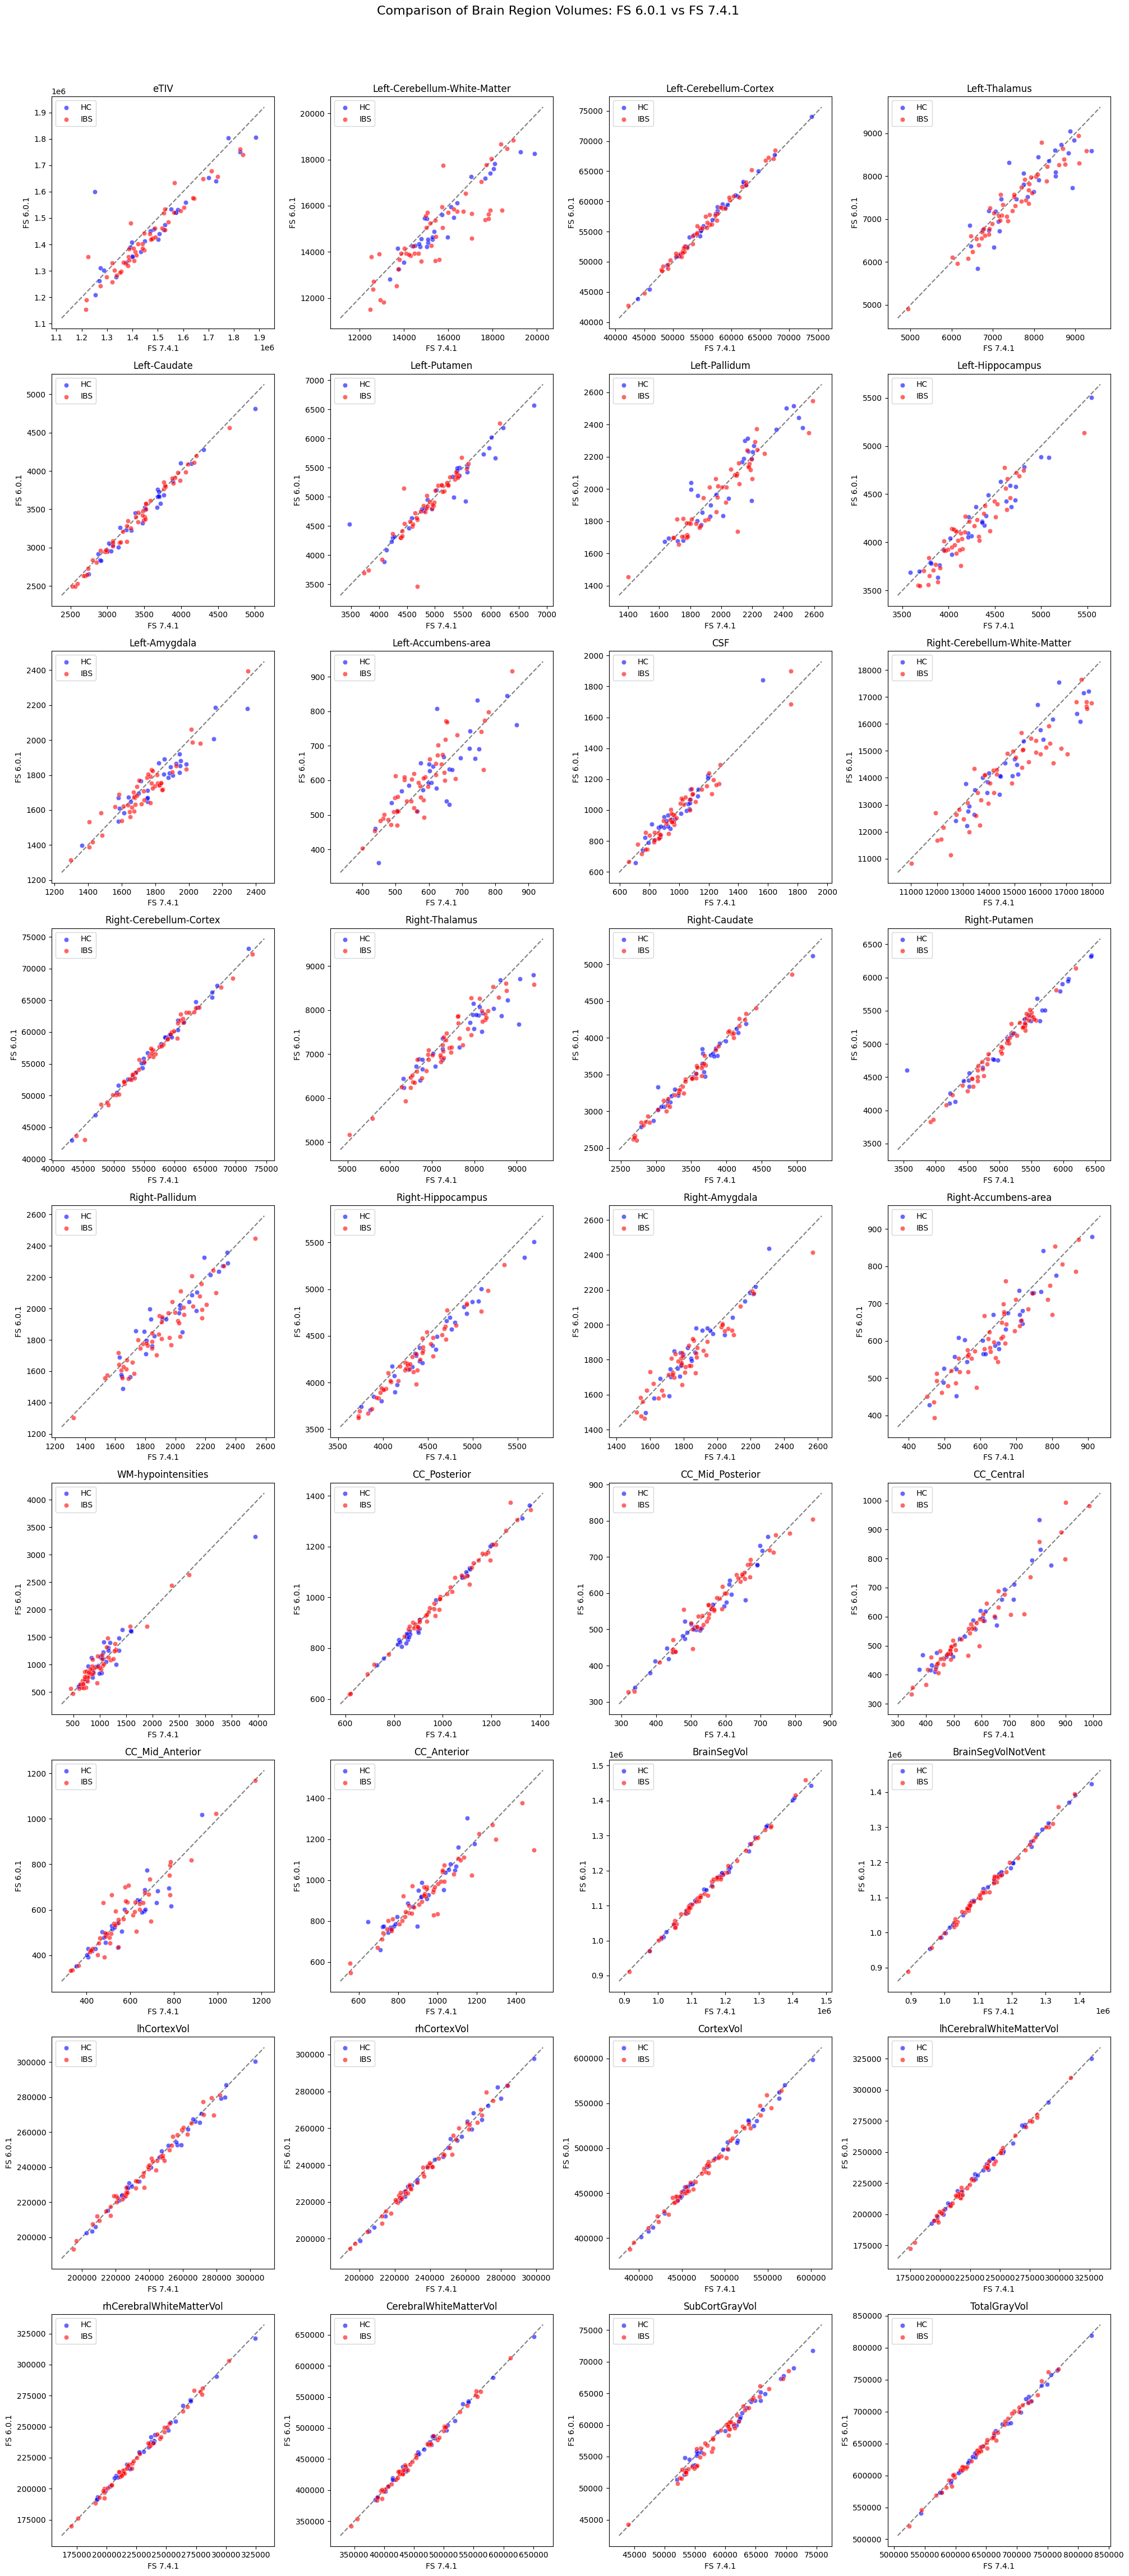

In [53]:
# Set up the plotting parameters
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Get list of brain regions (excluding non-volume columns)
brain_regions = [col for col in df_fs6_cross.columns 
                if col not in ['Subject', 'Group']]

n_plots_per_row = 4
# Calculate number of rows needed
n_rows = (len(brain_regions) + n_plots_per_row - 1) // n_plots_per_row

# Create a large figure
fig = plt.figure(figsize=(20, 5*n_rows))
gs = GridSpec(n_rows, n_plots_per_row, figure=fig)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Create scatter plot for each brain region
for idx, region in enumerate(brain_regions):
    row = idx // n_plots_per_row
    col = idx % n_plots_per_row
    ax = fig.add_subplot(gs[row, col])
    
    # Plot HC group
    sns.scatterplot(data=df_fs6_cross[df_fs6_cross['Group']=='HC'], 
                   x=df_fs7_cross[df_fs7_cross['Group']=='HC'][region],
                   y=df_fs6_cross[df_fs6_cross['Group']=='HC'][region],
                   label='HC', color='blue', alpha=0.6)
    
    # Plot IBS group
    sns.scatterplot(data=df_fs6_cross[df_fs6_cross['Group']=='IBS'],
                   x=df_fs7_cross[df_fs7_cross['Group']=='IBS'][region],
                   y=df_fs6_cross[df_fs6_cross['Group']=='IBS'][region],
                   label='IBS', color='red', alpha=0.6)
    
    # Add identity line
    lims = [
        min(ax.get_xlim()[0], ax.get_ylim()[0]),
        max(ax.get_xlim()[1], ax.get_ylim()[1]),
    ]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0)
    
    # Labels and title
    ax.set_xlabel('FS 7.4.1')
    ax.set_ylabel('FS 6.0.1')
    ax.set_title(region)
    ax.legend()

plt.suptitle('Comparison of Brain Region Volumes: FS 6.0.1 vs FS 7.4.1', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()